In [21]:
import pandas as pd #For manipulating the data
import seaborn as sns #For plotting
from sklearn.preprocessing import LabelEncoder #TO encode Urban_or_Rural_Area
from sklearn.model_selection import train_test_split #Splitting data and finalling optimising
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from scipy.stats import mode
from statistics import mean

In [2]:
data = pd.read_csv("mydata.csv")

In [3]:
data.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Location,Speed_limit,Light_Conditions,Weather_Conditions,Urban_or_Rural_Area
0,52,2,1,1,6,612,40,6,1,2
1,1,3,2,1,6,22,30,7,1,1
2,21,3,1,1,6,257,30,4,1,1
3,35,2,2,1,6,395,70,4,1,2
4,97,3,1,1,6,913,60,6,8,2


In [4]:
for col in data.columns:
    var = data[col].isnull()
    print(var.value_counts())

False    4571
Name: Police_Force, dtype: int64
False    4571
Name: Accident_Severity, dtype: int64
False    4571
Name: Number_of_Vehicles, dtype: int64
False    4571
Name: Number_of_Casualties, dtype: int64
False    4571
Name: Day_of_Week, dtype: int64
False    4571
Name: Location, dtype: int64
False    4571
Name: Speed_limit, dtype: int64
False    4571
Name: Light_Conditions, dtype: int64
False    4571
Name: Weather_Conditions, dtype: int64
False    4571
Name: Urban_or_Rural_Area, dtype: int64


In [5]:
data.shape

(4571, 10)

In [6]:
data.columns

Index(['Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Location', 'Speed_limit',
       'Light_Conditions', 'Weather_Conditions', 'Urban_or_Rural_Area'],
      dtype='object')

In [7]:
lb_make = LabelEncoder()
data["Urban_or_Rural"] = lb_make.fit_transform(data["Urban_or_Rural_Area"])
data = data.drop('Urban_or_Rural_Area', axis=1)

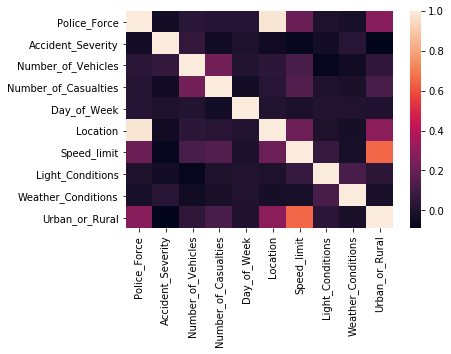

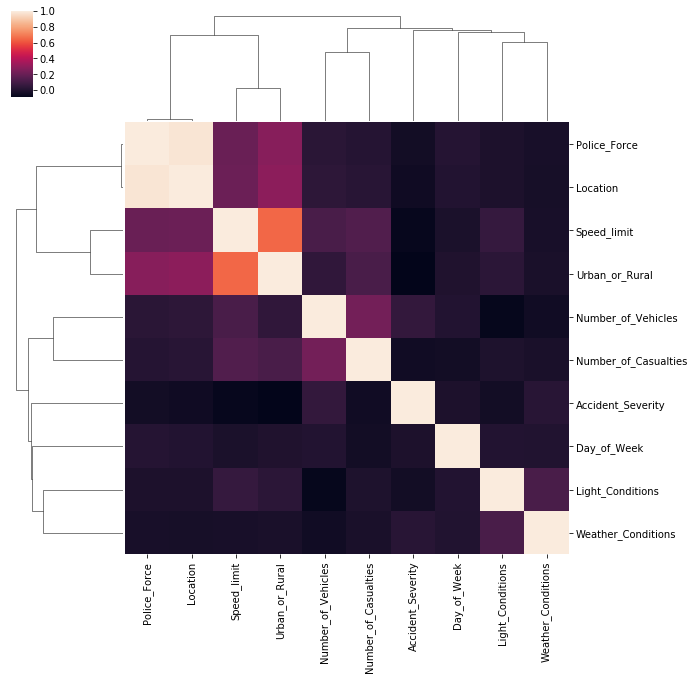

In [8]:
correlation = data.corr()
sns.heatmap(correlation)
sns.clustermap(correlation)

In [9]:
data.dtypes

Police_Force            int64
Accident_Severity       int64
Number_of_Vehicles      int64
Number_of_Casualties    int64
Day_of_Week             int64
Location                int64
Speed_limit             int64
Light_Conditions        int64
Weather_Conditions      int64
Urban_or_Rural          int64
dtype: object

In [10]:
data = shuffle(data)
target = data.Accident_Severity
data = data.drop('Accident_Severity', axis=1)
print(data.shape, "\n", target.shape)

(4571, 9) 
 (4571,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3199, 9) (3199,)
Test set: (1372, 9) (1372,)


In [22]:
SVC = SVC()
SVC.fit(X_train,y_train)
yhat = SVC.predict(X_test)
x1 = metrics.accuracy_score(y_test, yhat)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, SVC.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.8824632697718037
Test set Accuracy:  0.8097667638483965


In [23]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
yhat = LR.predict(X_test)
x2 = metrics.accuracy_score(y_test, yhat)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8255704907783682
Test set Accuracy:  0.8177842565597667


In [24]:
BNB = BernoulliNB()
BNB.fit(X_train,y_train)
yhat = BNB.predict(X_test)
x3 = metrics.accuracy_score(y_test, yhat)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, BNB.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8255704907783682
Test set Accuracy:  0.8177842565597667


In [27]:
class VoteClassifier():
    #docstring for VoteClassifier
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    def classify(self, features):
        votes =[]
        for c in self._classifiers:
            v = c.predict(features)
            votes.append(v)
        return str(mode(votes)[0])

    def confidence(self, features):
        votes =[]
        for c in self._classifiers:
            v = c.predict(features)
            votes.append(v)
        choice_votes = int(mode(votes)[1])
        conf = choice_votes / len(votes)
        return conf
    def test_accuracy(self,x1, x2,x3):
        average = mean([x1, x2,x3])
        return average


In [28]:
voted_classifier = VoteClassifier(SVC, LR, BNB)
print("Voted classifier accuracy percent: ", voted_classifier.test_accuracy(x1,x2,x3))

Voted classifier accuracy percent:  0.81511175898931
